# Curso de Inverno 
#### Professor Renato Rocha Souza

# Qual a carteira ótima de markowitz na Bolsa Balcão Brasil?

##### Por: Diogo Sánchez e Henrique Videira

## Markowitz


O economista estadunidense Harry Max Markowitz é responsável por criar a Teoria Moderno de porfolio, que busca maximizar o retorno/risco, no modelo, o risco é tratado como a Volatilidade da carteira e o retorno o retorno observado nos periodos históricos anteriores. Nesse trabalho vamos aplicar a sua teoria na Bolsa Brasileira e responder a seguinte pergunta: Qual a carteira ótima de markowitz no Brasil? 

## Trabalho de investimentos

Como partes fundamentais do trabalho a primeira coisa que iremos fazer é definir os imports que serão utilizados.

In [1]:

# Stats and manipulation 
import numpy      as np
from   numpy      import cov
import pandas     as pd
import cvxpy      as cp
from   statistics import variance
from scipy import stats

# Graphs
import matplotlib.pyplot as plt
import seaborn           as sns

# Aux
from   datetime  import datetime
import datetime
import time
from   datetime  import date
from   operator  import is_not
from   functools import partial

#Specific 
import yfinance  as yf

# Beatiful Output
from IPython.display import display,clear_output




## Preço de fechamento ao longo dos anos

Agora vamos scrappar todas os underline listados na bolsa brasileira. 

In [2]:

li = []
nomes = []

## A lista abaixo foi scrappada anteriormente, depois copiamos e colamos para não ter que ficar rodando o código sempre (ele demora)
  
ativos = [  "^BVSP"    ,  'ARML3.SA' ,  'MLAS3.SA' ,  'CBAV3.SA' ,  'TTEN3.SA' ,  'BRBI11.SA',  'NINJ3.SA' ,  'MODL4.SA' ,
            'MODL3.SA' ,  'VITT3.SA' ,  'KRSA3.SA' ,  'CXSE3.SA' ,  'GGPS3.SA' ,  'MATD3.SA' ,  'ALLD3.SA' ,  'BLAU3.SA' , 
            'ATMP3.SA' ,  'ASAI3.SA' ,  'JSLG3.SA' ,  'CMIN3.SA' ,  'ELMD3.SA' ,  'ORVR3.SA' ,  'OPCT3.SA' ,  'WEST3.SA' , 
            'CSED3.SA' ,  'BMOB3.SA' ,  'JALL3.SA' ,  'MBLY3.SA' ,  'ESPA3.SA' ,  'VAMO3.SA' ,  'INTB3.SA' ,  'BMLC11.SA', 
            'RECR11.SA',  'NGRD3.SA' ,  'AVLL3.SA' ,  'RRRP3.SA' ,  'ENJU3.SA' ,  'CASH3.SA' ,  'TFCO4.SA' ,  'GMAT3.SA' , 
            'SEQL3.SA' ,  'BOAS3.SA' ,  'MELK3.SA' ,  'HBSA3.SA' ,  'CURY3.SA' ,  'PLPL3.SA' ,  'PETZ3.SA' ,  'PGMN3.SA' , 
            'LAVV3.SA' ,  'LJQQ3.SA' ,  'DMVF3.SA' ,  'SOMA3.SA' ,  'AMBP3.SA' ,  'ALPK3.SA' ,  'MTRE3.SA' ,  'MDNE3.SA' , 
            'VIIA3.SA' ,  'CEAB3.SA' ,  'WHRL4.SA' ,  'WHRL3.SA' ,  'TCSA3.SA' ,  'SBUB34.SA',  'SEER3.SA' ,  'SLED4.SA' , 
            'HOOT4.SA' ,  'GFSA3.SA' ,  'YDUQ3.SA' ,  'CYRE3.SA' ,  'CVCB3.SA' ,  'VIVA3.SA' ,  'PGCO34.SA',  'BRFS3.SA' , 
            'STOC31.SA',  'IGTI11.SA',  'XPBR31.SA',  'TRAD3.SA' ,  'ALSO3.SA' ,  'BMIN3.SA' ,  'MERC4.SA' ,  'LOGG3.SA' , 
            'IRBR3.SA' ,  'PDTC3.SA' ,  'SYNE3.SA' ,  'BRML3.SA' ,  'BBSE3.SA' ,  'BPAN4.SA' ,  'AXPB34.SA',  'LAND3.SA' , 
            'DEXP4.SA' ,  'VALE5.SA' ,  'MMXM3.SA' ,  'GOAU4.SA' ,  'DXCO3.SA' ,  'BRKM6.SA' ,  'ARMT34.SA',  'GTLG11.SA', 
            'PPLA11.SA',  'CXAG11.SA',  'ROOF11.SA',  'BIME11.SA',  'PORT3.SA' ,  'GETT11.SA',  'BIYE39.SA',  'BOEF39.SA', 
            'BURT39.SA',  'BICL39.SA',  'BIXG39.SA',  'C2OI34.SA',  'S2TO34.SA',  'W2ST34.SA',  'S2QS34.SA',  'P2AT34.SA', 
            'G2DD34.SA',  'D2AS34.SA',  'C2PT34.SA',  'BIVW39.SA',  'BIVE39.SA',  'BCWV39.SA',  'A2VL34.SA',  'A2MC34.SA', 
            'AGXY3.SA' ,  'CRPG6.SA' ,  'SMFT3.SA' ,  'SOJA3.SA' ,  'T2TD34.SA',  'T2DH34.SA',  'S2UI34.SA',  'S2QU34.SA', 
            'S2NW34.SA',  'S2HO34.SA',  'C2ZR34.SA',  'U2ST34.SA',  'S2EA34.SA',  'P2EN34.SA',  'M2PW34.SA',  'K2CG34.SA', 
            'D2KN34.SA',  'C2HD34.SA',  'B2YN34.SA',  'ENMT4.SA' ,  'AIEC11.SA',  'VBBR3.SA' ,  'RAIZ4.SA' ,  'RECV3.SA' , 
            'COPH34.SA',  'UGPA3.SA' ,  'EXXO34.SA',  'ENAT3.SA' ,  'ONCO3.SA' ,  'VVEO3.SA' ,  'PARD3.SA' ,  'OFSA3.SA' , 
            'JNJB34.SA',  'HYPE3.SA' ,  'FLRY3.SA' ,  'BMYB34.SA',  'ABTT34.SA',  'CLSA3.SA' ,  'LVTC3.SA' ,  'G2DI33.SA', 
            'IFCM3.SA' ,  'GOGL35.SA',  'LWSA3.SA' ,  'EBAY34.SA',  'BRIT3.SA' ,  'FIQE3.SA' ,  'DESK3.SA' ,  'ATTB34.SA', 
            'AURE3.SA' ,  'MEGA3.SA' ,  'NEOE3.SA' ,  'EGIE3.SA' ,  'TAEE4.SA' ,  'RNEW11.SA',  'GEPA4.SA' ,  'CMIG4.SA' , 
            'AFLT3.SA' ,  'AERI3.SA' ,  'DOTZ3.SA' ,  'MODL11.SA',  'NFLX34.SA',  'NIKE34.SA',  'MCDC34.SA',  'HOME34.SA', 
            'FDMO34.SA',  'CMCS34.SA',  'RDNI3.SA' ,  'RSID3.SA' ,  'MNDL3.SA' ,  'LEVE3.SA' ,  'MYPK3.SA' ,  'GRND3.SA' , 
            'LCAM3.SA' ,  'LLIS3.SA' ,  'DIRR3.SA' ,  'EVEN3.SA' ,  'AMAR3.SA' ,  'MOVI3.SA' ,  'JHSF3.SA' ,  'HBOR3.SA' , 
            'PDGR3.SA' ,  'EZTC3.SA' ,  'RENT3.SA' ,  'MRVE3.SA' ,  'MGLU3.SA' ,  'LREN3.SA' ,  'COGN3.SA' ,  'SBFG3.SA' , 
            'WALM34.SA',  'PEPB34.SA',  'COLG34.SA',  'COCA34.SA',  'SMTO3.SA' ,  'MDIA3.SA' ,  'CAML3.SA' ,  'AGRO3.SA' ,
            'BEEF3.SA' ,  'CRFB3.SA' ,  'NTCO3.SA' ,  'MRFG3.SA' ,  'JBSS3.SA' ,  'BIDI3.SA' ,  'IGTI3.SA' ,  'WFCO34.SA', 
            'VISA34.SA',  'MSBR34.SA',  'MSCD34.SA',  'JPMC34.SA',  'HONB34.SA',  'GEOO34.SA',  'GSGI34.SA', 'CTGP34.SA' ,
            'BOAC34.SA',  'MMMC34.SA',  'SCAR3.SA' ,  'LPSB3.SA' ,  'BMGB4.SA' ,  'IGBR3.SA' ,  'GSHP3.SA' ,  'PSSA3.SA' , 
            'CARD3.SA' ,  'BRPR3.SA' ,  'MULT3.SA' ,  'ITUB4.SA' ,  'ITSA4.SA' ,  'BBDC4.SA' ,  'APER3.SA' ,  'BBAS3.SA' , 
            'DEXP3.SA' ,  'FCXO34.SA',  'PMAM3.SA' ,  'EUCA4.SA' ,  'SUZB3.SA' ,  'UNIP6.SA' ,  'MMXM11.SA',  'CSNA3.SA' ,
            'BRAP4.SA' ,  'CPLE11.SA',  'GETT4.SA' ,  'CRPG5.SA' ,  'ENMT3.SA' ,  'SLBG34.SA',  'HALI34.SA',  'CHVX34.SA',
            'PRIO3.SA' ,  'OSXB3.SA' ,  'RPMG3.SA' ,  'PETR4.SA' ,  'BIOM3.SA' ,  'PFIZ34.SA',  'MRCK34.SA',  'PNVL3.SA' , 
            'AALR3.SA' ,  'ODPV3.SA' ,  'RADL3.SA' ,  'QUAL3.SA' ,  'TOTS3.SA' ,  'XRXB34.SA',  'QCOM34.SA',  'ORCL34.SA', 
            'MSFT34.SA',  'IBMB34.SA',  'ITLC34.SA',  'HPQB34.SA',  'CSCO34.SA',  'AAPL34.SA',  'POSI3.SA' ,  'VERZ34.SA', 
            'OIBR4.SA' ,  'TIMS3.SA' ,  'VIVT3.SA' ,  'TELB4.SA' ,  'CEGR3.SA' ,  'CPFE3.SA' ,  'AESB3.SA' ,  'TRPL4.SA' , 
            'TAEE3.SA' ,  'SBSP3.SA' ,  'GEPA3.SA' ,  'CEDO4.SA' ,  'SLED3.SA' ,  'CTKA4.SA' ,  'CGRA4.SA' ,  'ESTR4.SA' , 
            'CTNM4.SA' ,  'BIDI11.SA',  'BSLI4.SA' ,  'ITUB3.SA' ,  'BBDC3.SA' ,  'FESA4.SA' ,  'EUCA3.SA' ,  'BRKM5.SA' ,
            'GETT3.SA' ,  'CRPG3.SA' ,  'DMMO3.SA' ,  'BALM4.SA' ,  'CEED4.SA' ,  'EEEL4.SA' ,  'CASN4.SA' ,  'CLSC4.SA' ,
            'CPLE6.SA' ,  'CGAS5.SA' ,  'TAEE11.SA',  'CMIG3.SA' ,  'CEDO3.SA' ,  'CTKA3.SA' ,  'CGRA3.SA' ,  'ESTR3.SA' ,
            'CTNM3.SA' ,  'PCAR3.SA' ,  'BIDI4.SA' ,  'BSLI3.SA' ,  'BRSR6.SA' ,  'SANB4.SA' ,  'FESA3.SA' ,  'KLBN4.SA' ,
            'UNIP5.SA' ,  'BRKM3.SA' ,  'BRAP3.SA' ,  'PETR3.SA' ,  'BALM3.SA' ,  'TELB3.SA' ,  'CEPE6.SA' ,  'CEED3.SA' ,
            'EEEL3.SA' ,  'CASN3.SA' ,  'CEBR6.SA' ,  'RNEW4.SA' ,  'COCE6.SA' ,  'CLSC3.SA' ,  'ALUP4.SA' ,  'SAPR4.SA' ,
            'CPLE5.SA' ,  'CGAS3.SA' ,  'TRPL3.SA' ,  'BRSR5.SA' ,  'SANB3.SA' ,  'KLBN3.SA' ,  'UNIP3.SA' ,  'CEPE5.SA' ,
            'CEBR5.SA' ,  'RNEW3.SA' ,  'COCE5.SA' ,  'ALUP3.SA' ,  'SAPR3.SA' ,  'BRSR3.SA' ,  'SANB11.SA',  'KLBN11.SA',
            'CEPE3.SA' ,  'CEBR3.SA' ,  'COCE3.SA' ,  'ALUP11.SA',  'SAPR11.SA',  'CPLE3.SA' ]



for ativo in ativos:
    data_i = yf.Ticker(ativo).history(period='Max').rename(columns = {"Close":'Close/Last'})
    data_i = data_i[data_i.index > pd.Timestamp("2015-01-01")]
    if len(data_i) >5:
        li.append(data_i)
        nomes.append(ativo.replace('.SA','').replace("^BVSP","IBOV"))
        clear_output()
df = dict(zip(nomes, li))
companies = list(df.keys())

Abaixo uma visualização simples dos ativos que iremos trabalhar nesse projeto

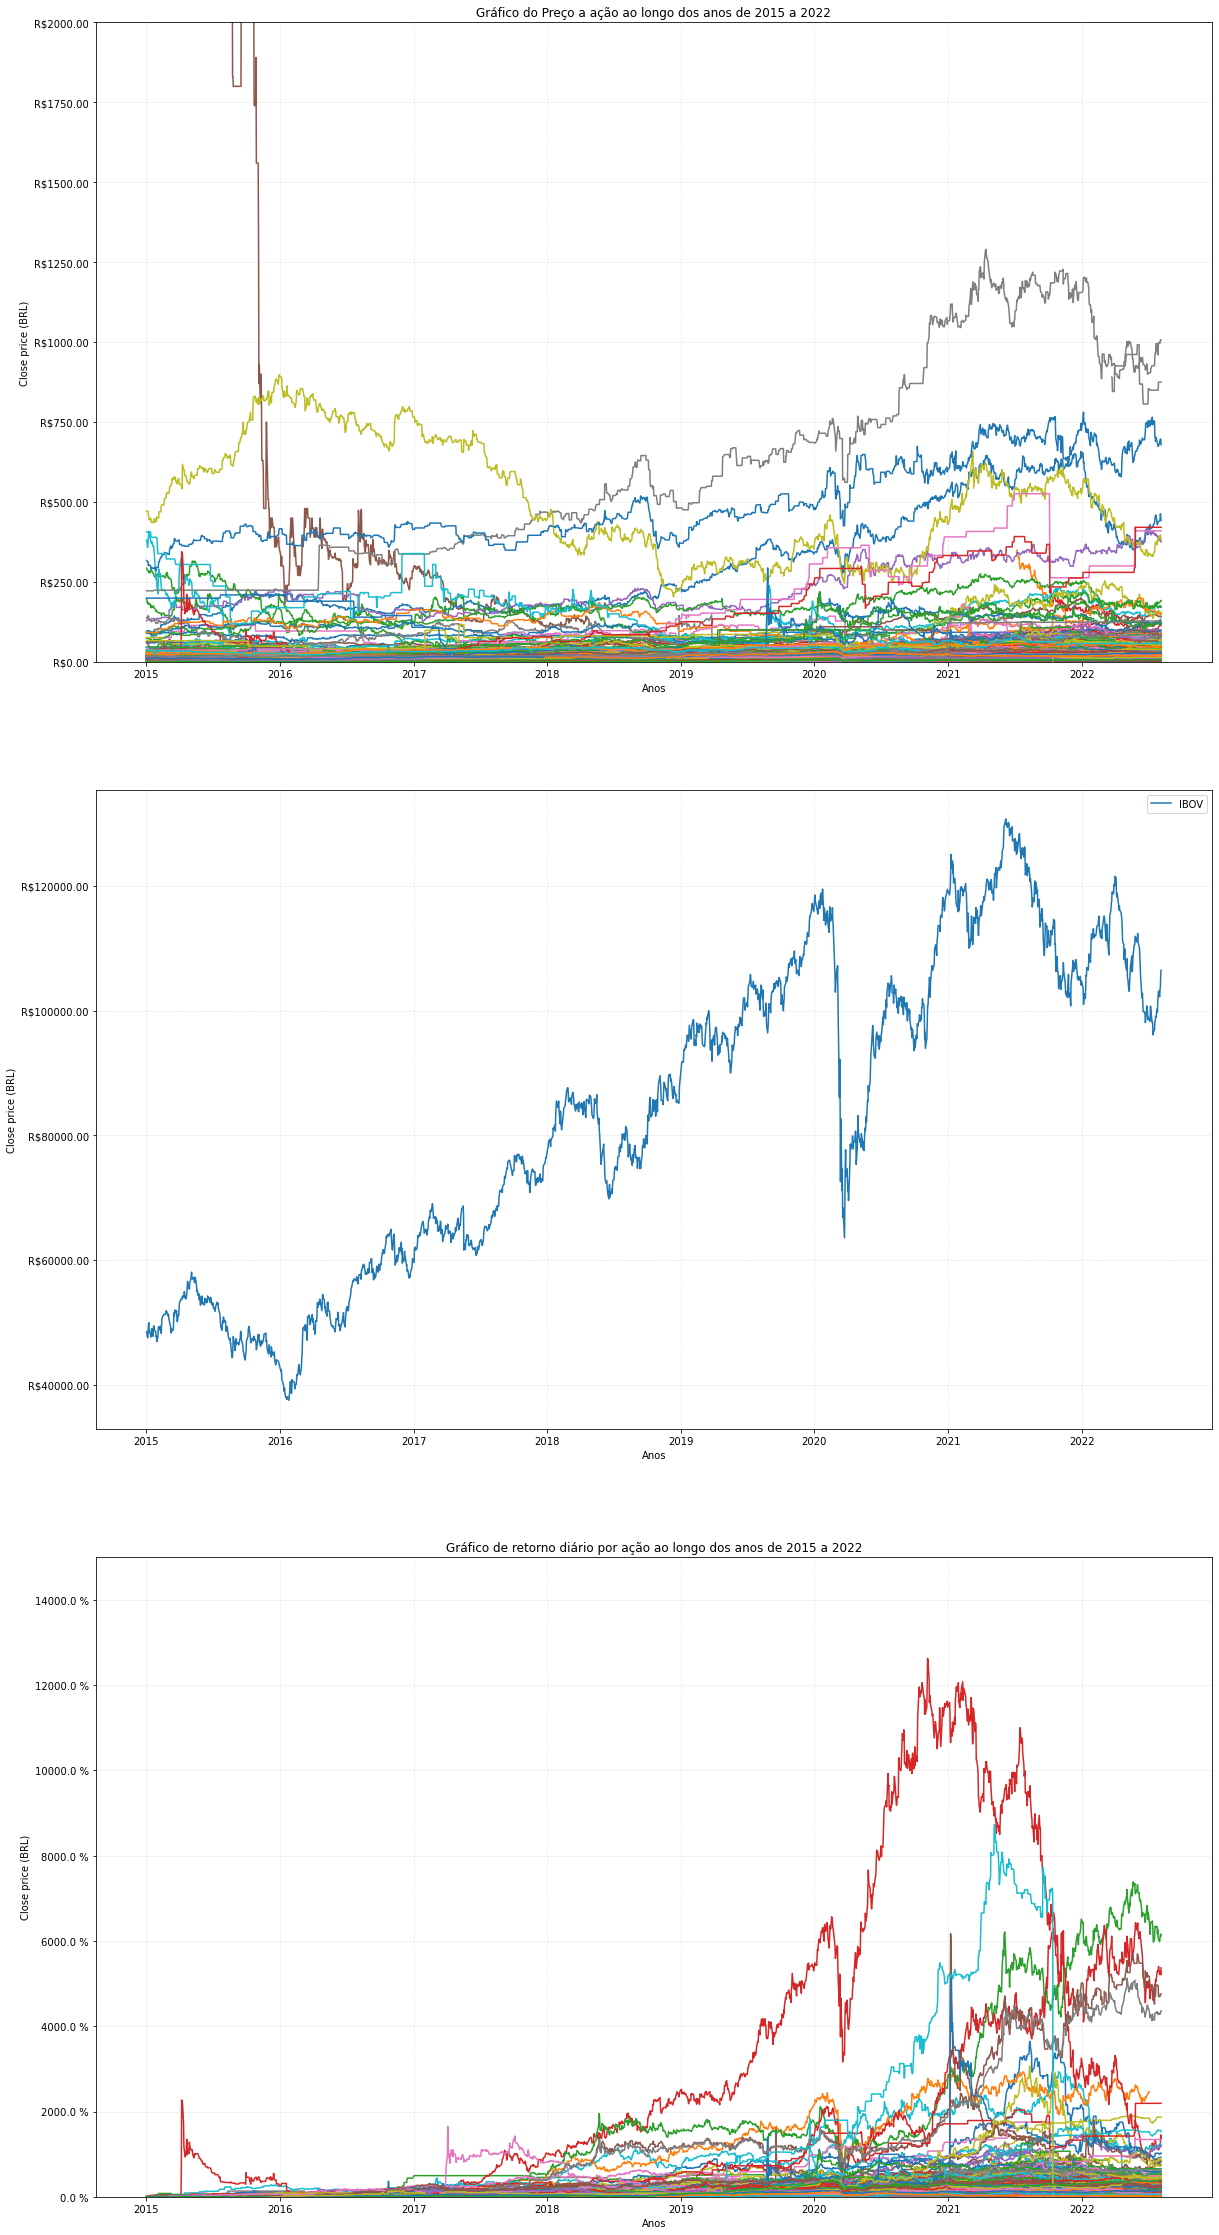

In [3]:

## Plotagem
fig, ax = plt.subplots(3, 1, figsize = (20,40))

for i,c in enumerate(companies):
    if c != 'IBOV':
        sns.lineplot(x = df[c].index, y = df[c]['Close/Last'], ax=ax[0])
sns.lineplot(x=df['IBOV'].index, y=df['IBOV']['Close/Last'], label = 'IBOV', ax=ax[1])
ax[0].set_ylabel('Close price (BRL)')
ax[0].set_xlabel('Anos')
ax[0].set_ylim([0,2000])

ax[0].yaxis.set_major_formatter('R${x:1.2f}')
ax[0].title.set_text('Gráfico do Preço a ação ao longo dos anos de 2015 a 2022')
ax[0].grid(color='#C0C0C0', linestyle=':', linewidth=0.5)



ax[1].set_ylabel('Close price (BRL)')
ax[1].set_xlabel('Anos')
ax[1].yaxis.set_major_formatter('R${x:1.2f}')
ax[1].grid(color='#C0C0C0', linestyle=':', linewidth=0.5)


for i,c in enumerate(companies):
    if c != 'IBOV':
        sns.lineplot(x = df[c].index, y = 100*(df[c]['Close/Last']/df[c]['Close/Last'][0] -1), ax=ax[2])
ax[2].set_ylabel('Close price (BRL)')
ax[2].set_xlabel('Anos')

ax[2].set_ylim([0,15000])
ax[2].yaxis.set_major_formatter('{x:1.1f} %')
ax[2].title.set_text('Gráfico de retorno diário por ação ao longo dos anos de 2015 a 2022')
ax[2].grid(color='#C0C0C0', linestyle=':', linewidth=0.5)

plt.show()

# Retorno Acumulado (%) 2022


*O retorno acumulado para cada dia dos fundos pode ser calculado utilizando juros compostos:**
$$
R_a(n) = -1 + \prod_{i=1}^n (1+R_p(i))
$$
Fazemos isso com a função `cumprod` do `pandas`<br>
Vamos ver quais empresas melhor performaram em `2022`

In [4]:
ret_aux_2022 = []
companies_2022 = []
for c in companies:
    if len (df[c].loc['2022-1-1':'2022-12-31']['Close/Last']) >5:
        k = df[c].loc['2022-1-1':'2022-12-31']['Close/Last'] / df[c].loc['2022-1-1':'2022-12-31']['Close/Last'][0] -1
        if len(k) > 10:
            ret_aux_2022.append(k)
            companies_2022.append(c)
ret_acum_2022 = dict(zip(companies_2022, ret_aux_2022))

melhores_ret_2022 = []
for c in companies_2022:
    melhores_ret_2022.append(ret_acum_2022[c].iloc[-1])
dic_2022 = dict(zip(companies, melhores_ret_2022))
melhores_ret_2022 = pd.DataFrame(dic_2022, index=[0])
companies_best_2022 = melhores_ret_2022.T.sort_values(0,ascending=False).index[:20]


In [5]:
ret_aux_2021 = []
for c in companies:
    ret_aux_2021.append((1+df[c].loc['2021-1-1':'2021-12-31']['Close/Last'].pct_change()).cumprod() - 1)
ret_acum_2021 = dict(zip(companies, ret_aux_2021))

Aqui temos qual vai ser o retorno acumulado ods ativos no ano de 2022

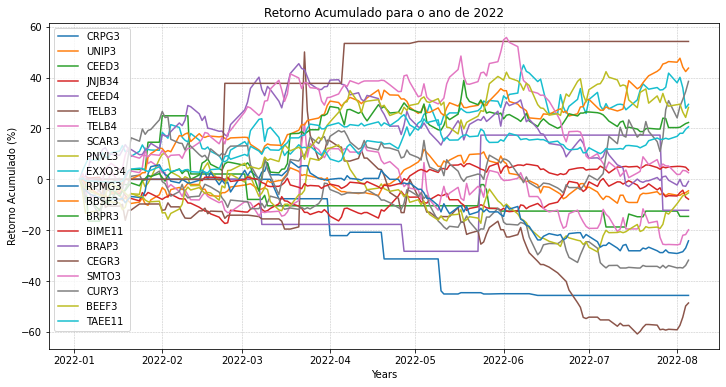

In [6]:
fig = plt.figure(figsize = (12,6))
for c in companies_best_2022:
    sns.lineplot(x=ret_acum_2022[c].index, y=ret_acum_2022[c]*100, label = c)
plt.legend()
plt.ylabel('Retorno Acumulado (%)')
plt.xlabel('Years')
plt.title('Retorno Acumulado para o ano de 2022')
plt.grid(color='#C0C0C0', linestyle='--', linewidth=0.5)
plt.show()

In [7]:
melhores_ret_2021 = []
companies_2021 = []
for c in ret_acum_2021.keys():
    try:
         k= (ret_acum_2021[c].iloc[-1])
         melhores_ret_2021.append(k)
    except:
        continue
    companies_2021.append(c)
dic_2021 = dict(zip(companies_2021, melhores_ret_2021))
melhores_ret_2021 = pd.DataFrame(dic_2021, index=[0])
companies_best_2021 = melhores_ret_2021.T.sort_values(0,ascending=False).index[:20]
companies_2021 = companies_best_2021

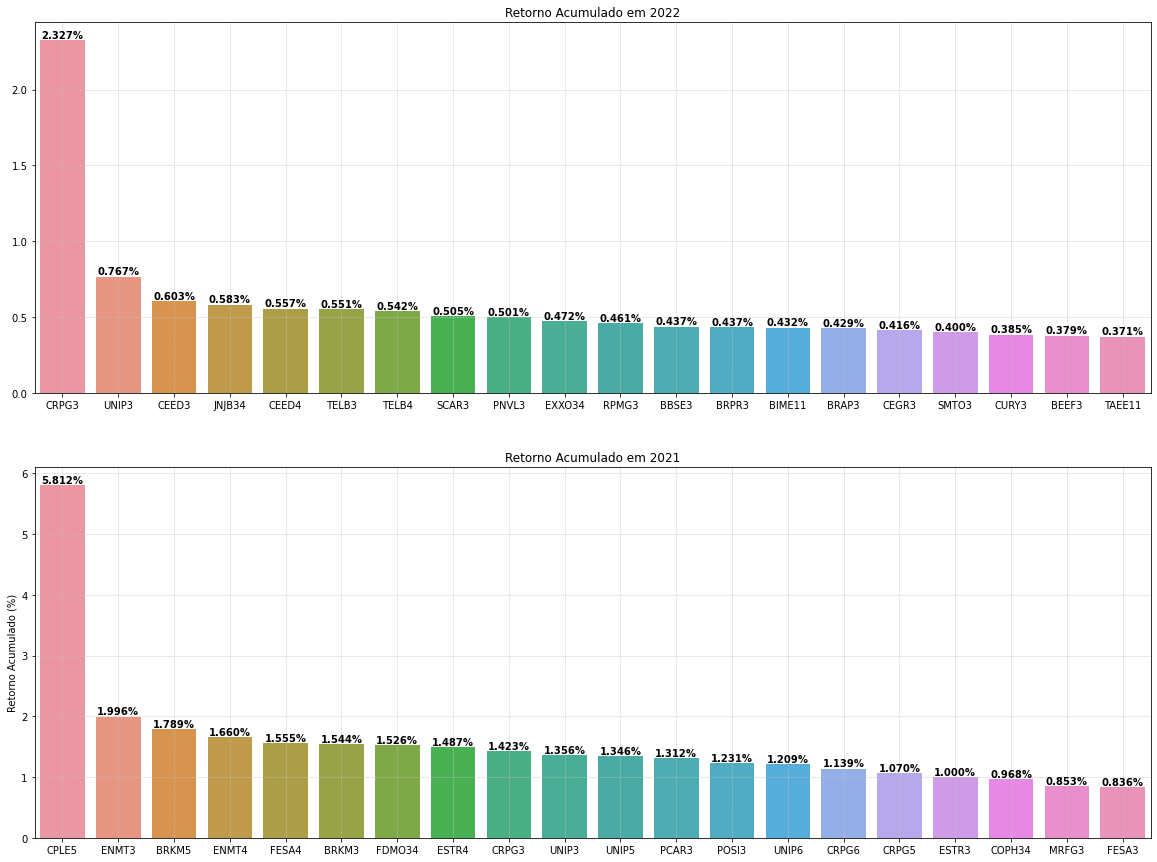

In [8]:
fig, ax = plt.subplots(2, 1, figsize = (20,15))

sns.barplot(melhores_ret_2022.T.sort_values(0,ascending=False)[0][:20].index ,melhores_ret_2022.T.sort_values(0,ascending=False)[0][:20].values  , ax=ax[0])
sns.barplot(melhores_ret_2021.T.sort_values(0,ascending=False)[0][:20].index ,melhores_ret_2021.T.sort_values(0,ascending=False)[0][:20].values  , ax=ax[1])
for a in ax:
    for p in a.patches:
            a.annotate('{:.3f}%'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                        ha='center', va='bottom', color= 'black', weight = 'bold')

plt.ylabel('Retorno Acumulado (%)')
ax[0].set_title('Retorno Acumulado em 2022')
ax[1].set_title('Retorno Acumulado em 2021')
ax[0].grid(color='#C0C0C0', linestyle='--', linewidth=0.5)
ax[1].grid(color='#C0C0C0', linestyle='--', linewidth=0.5)
clear_output()
plt.show()

### Matriz de Correlação

In [9]:
ret_aux = []

for c in companies:
    ret = df[c].sort_index().loc['2021-01-01':]['Close/Last'].pct_change()
    ret_aux.append(ret)
dic_aux = dict(zip(companies, ret_aux))

df_ret = pd.DataFrame(dic_aux)


<AxesSubplot:>

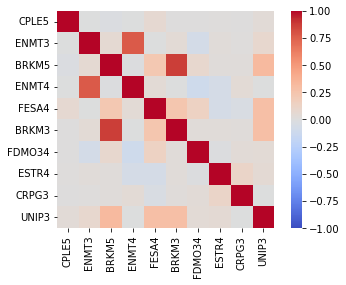

In [10]:
sns.heatmap(df_ret[melhores_ret_2021.T.sort_values(0,ascending=False)[0][:10].index].loc['2021-01-05':'2021-12-30'].fillna(0).corr() ,
            cmap ='coolwarm',
            vmin=-1,
            square= True)

## Correlação entre os retornos

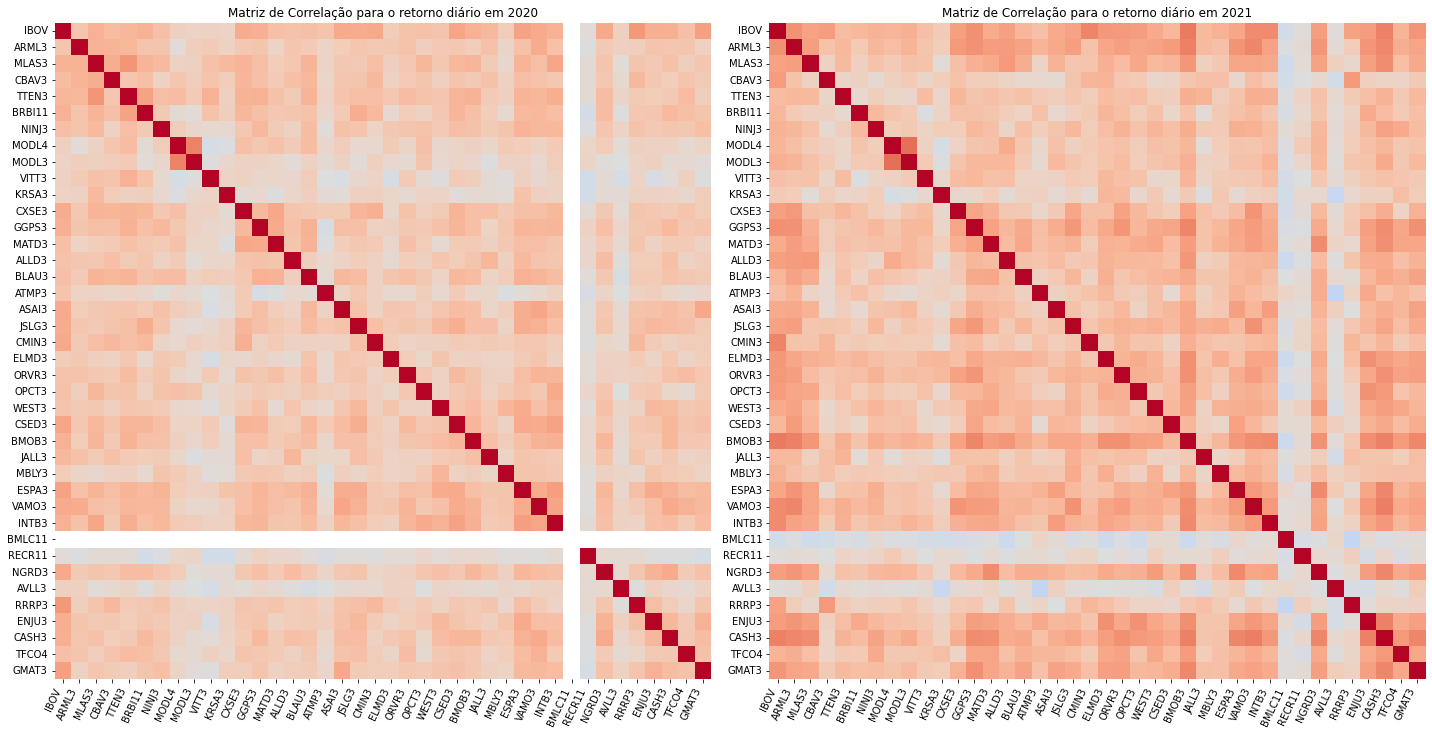

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (20,15))


ax[0] = sns.heatmap(df_ret.loc['2021-01-05':'2021-12-30'].fillna(0)[melhores_ret_2021.T.index[:40]].corr(),
    cmap='coolwarm',
    square=True,
    annot_kws = {"size": "8"},
    fmt = '.1', ax=ax[0],
    cbar=False,vmax=1,vmin=-1)

ax[1] = sns.heatmap(df_ret.loc['2022-01-05':].fillna(0)[melhores_ret_2021.T.index[:40]].corr(),
    cmap='coolwarm',
    square=True,
    annot_kws = {"size": "8"},
    fmt = '.1', ax=ax[1],
    cbar=False,vmax=1,vmin=-1)
    
for a in ax:
    a.set_xticklabels(
        a.get_xticklabels(),
        rotation=65,
        horizontalalignment='right'
    );

ax[1].set_title('Matriz de Correlação para o retorno diário em 2021')
ax[0].set_title('Matriz de Correlação para o retorno diário em 2020')
fig.tight_layout()
plt.show()

Text(0.5, 1.0, ' Mudança de correlação entre 2020 e 2021')

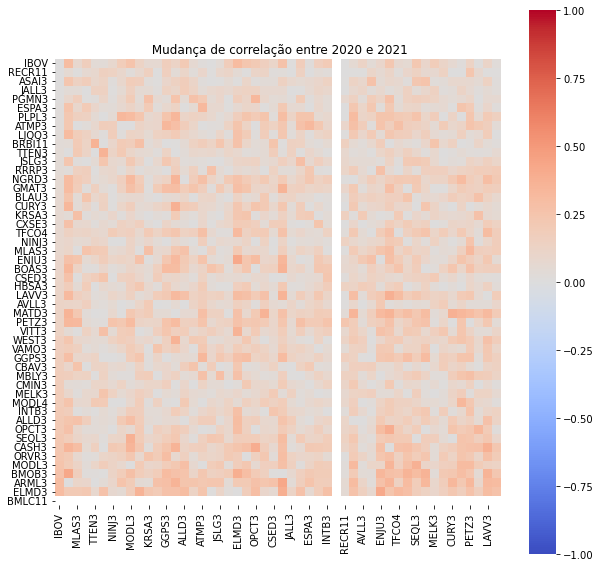

In [12]:

mudanca_corr = df_ret.loc['2021-01-05':'2021-12-30'].fillna(0)[melhores_ret_2021.T.index[:50]].corr().sort_values('IBOV') - df_ret.loc['2022-01-05':].fillna(0)[melhores_ret_2021.T.index[:50]].corr().sort_values('IBOV').dropna()
mudanca_corr = mudanca_corr.abs()
plt.figure(figsize=(10,10))
sns.heatmap(mudanca_corr.sort_values('IBOV'),
    cmap='coolwarm',
    square=True,
    annot_kws = {"size": "8"},
    fmt = '.1',
    vmin=-1,
    vmax=1)
plt.title(" Mudança de correlação entre 2020 e 2021")

<Figure size 720x720 with 0 Axes>

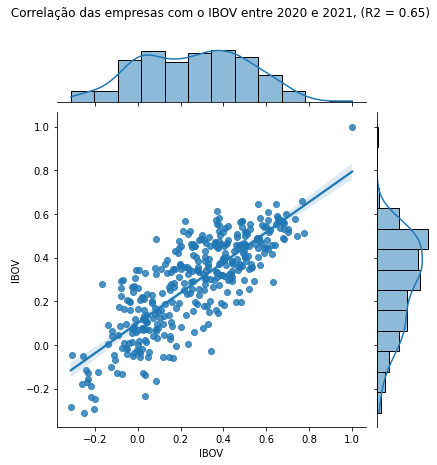

In [133]:

plt.figure(figsize=(10,10))


x=df_ret.loc['2021-01-05':'2021-12-30'].fillna(0).corr()['IBOV']
y=df_ret.loc['2021-12-30':].fillna(0).corr()['IBOV']




sns.jointplot(x, y, kind="reg")


plt.title(f" Correlação das empresas com o IBOV entre 2020 e 2021, (R2 = {stats.linregress(x.fillna(0).values,y.fillna(0).values).rvalue**2:.2f})\n \n \n\n\n\n",loc='right')

clear_output()
plt.show()

# Medida de Risco - Vol

In [134]:
ret_aux = []
for c in companies:
    if c == 'ASAI3':
        ret_aux.append(df[c]['Close/Last'].pct_change())
    else:
        ret_aux.append(df[c].sort_index().loc['2022-01-04':]['Close/Last'].pct_change())
    #ret_aux.append(df[c].loc['2019-1-1':'2020-11-13']['Close/Last'].pct_change())

dic_ret = {c: r for c,r in zip(companies, ret_aux)}

df_ret = pd.DataFrame(dic_ret)

## Risco Retorno

posx and posy should be finite values
posx and posy should be finite values


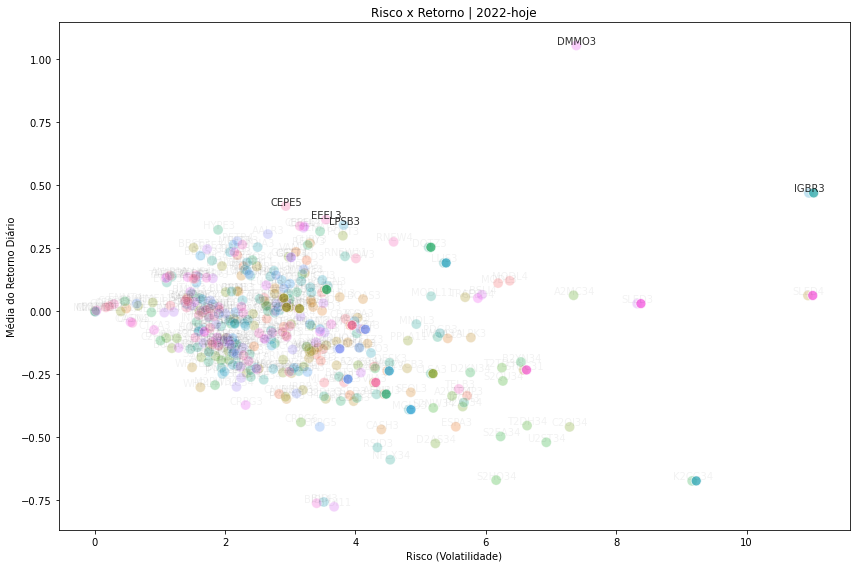

In [14]:
fig = plt.figure(figsize=(12,8))
plt.title('Risco x Retorno | 2022-hoje')
p = sns.scatterplot(y=df_ret.loc['2022-01-04':].fillna(df_ret.mean()).mean()*100,x=df_ret.loc['2022-01-04':].fillna(df_ret.mean()).std()*100, hue = companies, s = 100,alpha=0.3)
sns.scatterplot(y=df_ret.loc['2022-01-04':][melhores_ret_2021.T.sort_values(0,ascending=False)[-20:].index].fillna(df_ret.mean()).mean()*100,x=df_ret.loc['2022-01-04':].std()*100, hue = companies, s = 100,alpha=0.8)




tops = df_ret.loc['2022-01-04':].fillna(df_ret.mean()).mean().sort_values(ascending=False)[:5]

for i in range(len(companies)):

     if companies[i] in  tops:
          p.text(df_ret.loc['2022-01-04':].fillna(df_ret.mean()).std()[i]*100 +.01, df_ret.loc['2022-01-04':].fillna(df_ret.mean()).mean()[i]*100 + 0.005, companies[i],alpha=0.8,
                    horizontalalignment='center', 
               size='medium', color='black')
     
     p.text(df_ret.loc['2022-01-04':].fillna(df_ret.mean()).std()[i]*100 +.01, df_ret.loc['2022-01-04':].fillna(df_ret.mean()).mean()[i]*100 + 0.005, companies[i],alpha=0.05,
                    horizontalalignment='center', 
               size='medium', color='black')
               

p.get_legend().remove()
plt.ylabel('Média do Retorno Diário')
plt.xlabel('Risco (Volatilidade)')
plt.tight_layout()

clear_output()

plt.show()

## Bell Shape Curve with cVaR

$\mathrm{CVaR}_{\alpha}(X) = \frac{ \int_{-\inf}^{\alpha}\mathrm{x}(f(x))dx}{F(\alpha)}$

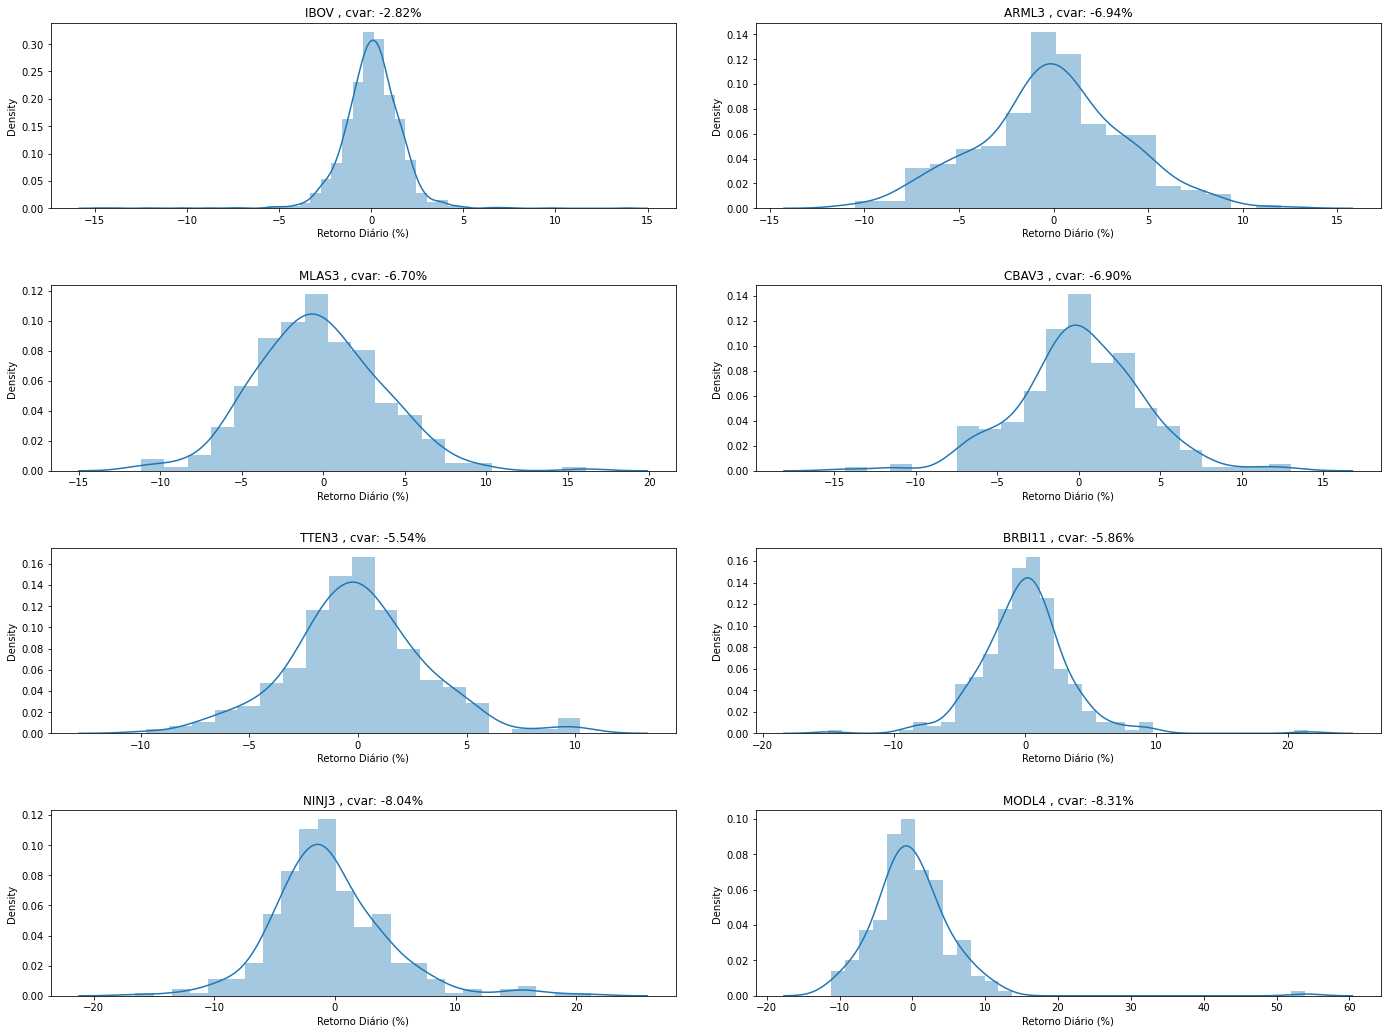

In [15]:
fig, ax = plt.subplots(4, 2, figsize = (20,15))

for i,row in enumerate(ax):
    for j, col in enumerate(row):
        sns.distplot(df[companies[j+2*i]].sort_index()['Close/Last'].pct_change()*100, ax = ax[i,j])
        cvar = df[companies[j+2*i]].sort_index()['Close/Last'].pct_change()*100
        cvar = cvar [cvar<cvar.sort_values().quantile(.10)].mean()
        ax[i,j].set_title(f"{companies[j+2*i]} , cvar: {cvar:.2f}%")
        ax[i,j].set_xlabel('Retorno Diário (%)')
        
fig.tight_layout(pad = 3.0)
from IPython.display import display,clear_output


clear_output(wait=True)
plt.show()

In [16]:
def CVaR(x,quantil=0.1):
    lista_np = x
    return lista_np [lista_np<lista_np.sort_values().quantile(quantil)].mean()

cvar_vol = [((df[i]['Close/Last'].pct_change()).std() ,CVaR((df[i]['Close/Last'].pct_change()))) for i in df]

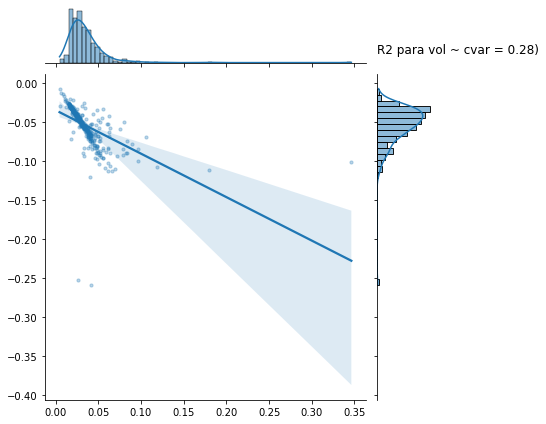

In [28]:
vol_scatter,cvar_scatter = pd.DataFrame(cvar_vol).dropna().T.to_numpy()




sns.jointplot(vol_scatter, cvar_scatter, kind="reg",joint_kws = {'scatter_kws':dict(alpha=0.3, s=10)})


plt.title(f"R2 para vol ~ cvar = {stats.linregress(vol_scatter,cvar_scatter).rvalue**2:.2f})\n ",loc='left')

clear_output()
plt.show()

## Buscando a carteira ótima

A seguir a relação risco / retorno de diferentes carteiras com pesos aleatóriamente distribuindo e utilizando 99 carteiras

<AxesSubplot:xlabel='Desv_pad', ylabel='Retorno'>

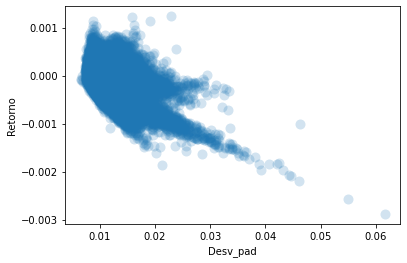

In [748]:
df_ret1 = df_ret[  df_ret.isnull().sum().sort_values()[:100].index ]
df_ret1 = df_ret1.fillna(0).drop(columns = 'IBOV')

Cv1 = df_ret1.loc['2021-01-04':'2021-04-14'].cov()
ret1 = (1+df_ret1.loc['2021-01-04':'2021-04-14'].mean().values)**252 -1
df_ret1 = df_ret1.T[list((df_ret1.mean()>-0.5).values)].T

cnt = len(df_ret1.columns)

def randPortf():
    res = np.exp(np.random.randn(cnt))
    res = res / res.sum()
    return res

r = randPortf()


retornos = df_ret1.mean()
risco_covs = df_ret1.cov()
def retorno_r(rand_):
    return np.matmul(retornos,rand_)
def risco_r (rand_):
    return np.sqrt(np.matmul(np.matmul(rand_,risco_covs.values),rand_))

N=1000000
riscos = {}
portf = portf = np.zeros((N,cnt))
retonos = {}
np.random.seed( 495984389)
for n in range(N):
    r = randPortf()

    portf[n,:] = r
    riscos[n] = risco_r(r)
    retonos[n] = retorno_r(r)
universo_inv = pd.DataFrame(range(N))
universo_inv.columns = ['Portf_Cod']
universo_inv['Retorno'] = retonos.values()
universo_inv['Desv_pad'] = riscos.values()
universo_inv=universo_inv.sort_values('Desv_pad')

sns.scatterplot( y= universo_inv['Retorno'] ,x= universo_inv['Desv_pad'],linewidth=0,alpha=0.2,s=100)

Segundo a Teoria de Markowitz, qualquer carteira que esteja na fronteira eficiente pode ser escrita como ponderação de quaisquer outras 2 carteira que também estejam na fronteira eficiente, sabendo disso, selecionamos 10 carteiras com o maior e com o menor índice de sharp, que são as mais fortes candidatas e estaram na fronteira eficiente, e simulamos centenas de ponderação entre elas

<AxesSubplot:xlabel='Desv_pad', ylabel='Retorno'>

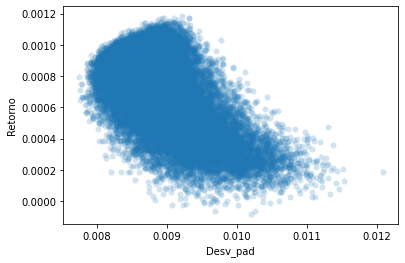

In [749]:
carteiras_usadas = 10

universo_inv['Sharpe'] = ((universo_inv['Retorno'] - 0.000170294191300879))/universo_inv['Desv_pad']
universo_inv.sort_values('Sharpe',inplace=True,ascending=False)
portf_otimos = list(portf[universo_inv[:carteiras_usadas].index]) + list(portf[universo_inv[-carteiras_usadas:].index])

portf_otimos=np.array(portf_otimos)


def random_2():
    R = (np.array([np.random.normal()*100 for i in range(carteiras_usadas)]))
    k= [R[i]*portf_otimos[i] for i in range(carteiras_usadas) ]
    s = k[0]
    for i in range(1,carteiras_usadas):
        s+=k[i]
    s = abs(np.array(s))
    return s/s.sum()


N=38000
riscos1 = {}
portf1 = np.zeros((N,cnt))
retonos1 = {}


for n in range(N):
    r = random_2()
    portf1[n,:] = r
    riscos1[n] = risco_r(r)
    retonos1[n] = retorno_r(r)


universo_inv = pd.DataFrame(range(N))
universo_inv.columns = ['Portf_Cod']
universo_inv['Retorno'] = retonos1.values()
universo_inv['Desv_pad'] = riscos1.values()


universo_inv=universo_inv.sort_values('Desv_pad')
universo_inv['risk_leveis'] = universo_inv['Desv_pad'].apply(lambda x: round(x,4))


sns.scatterplot( y= universo_inv['Retorno'] ,x= universo_inv['Desv_pad'],linewidth=0,alpha=0.2)


Agora vamos ser mais exigentes na escolha dos ativos que compoem o nosso universo de ativos, vamos escolher agora apenas os 15 ativos que tiveram o maior retorno de jan-2021 até hoje e repetir os passos anteriores

<AxesSubplot:xlabel='Desv_pad', ylabel='Retorno'>

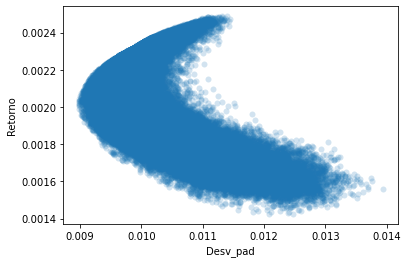

In [764]:
df_ret1 = df_ret[  df_ret.isnull().sum().sort_values()[:100].index ]
df_ret1 = df_ret1.fillna(0).drop(columns = 'IBOV')
coluns = df_ret1.columns
coluns = [ i for i in coluns if i in list((df_ret1.mean().sort_values(ascending=False)[:15]).index)]
df_ret1 = df_ret1[coluns]

cnt = len(df_ret1.columns)

retornos = df_ret1.mean()
risco_covs = df_ret1.cov()

def retorno_r(rand_):
    return np.matmul(retornos,rand_)
def risco_r (rand_):
    return np.sqrt(np.matmul(np.matmul(rand_,risco_covs.values),rand_))

N=10000
riscos = {}
portf = portf = np.zeros((N,cnt))
retonos = {}
np.random.seed( 495984389)
for n in range(N):
    r = randPortf()

    portf[n,:] = r
    riscos[n] = risco_r(r)
    retonos[n] = retorno_r(r)
universo_inv = pd.DataFrame(range(N))
universo_inv.columns = ['Portf_Cod']
universo_inv['Retorno'] = retonos.values()
universo_inv['Desv_pad'] = riscos.values()
universo_inv=universo_inv.sort_values('Desv_pad')


carteiras_usadas = 5

universo_inv['Sharpe'] = ((universo_inv['Retorno'] - 0.000170294191300879))/universo_inv['Desv_pad']
universo_inv.sort_values('Sharpe',inplace=True,ascending=False)
portf_otimos =(portf[universo_inv[:carteiras_usadas].index]) 


N=380000
riscos1 = {}
portf1 = np.zeros((N,cnt))
retonos1 = {}

for n in range(N):
    r = random_2()
    portf1[n,:] = r
    riscos1[n] = risco_r(r)
    retonos1[n] = retorno_r(r)
universo_inv = pd.DataFrame(range(N))
universo_inv.columns = ['Portf_Cod']
universo_inv['Retorno'] = retonos1.values()
universo_inv['Desv_pad'] = riscos1.values()

universo_inv=universo_inv.sort_values('Desv_pad')
universo_inv['risk_leveis'] = universo_inv['Desv_pad'].apply(lambda x: round(x,4))


universo_inv['Sharpe'] = ((universo_inv['Retorno'] - 0.000170294191300879))/universo_inv['Desv_pad']
sns.scatterplot( y= universo_inv['Retorno'] ,x= universo_inv['Desv_pad'],linewidth=0,alpha=0.2)


Agora vamos olhas qual o portf com maior sharpe dentro dos portfolios analisados, risk_leveis é o desv_pad arredondado

In [768]:
universo_inv=universo_inv.sort_values('Sharpe',ascending=False)
universo_inv.head(10)

,Portf_Cod,Retorno,Desv_pad,risk_leveis,Sharpe
57474,57474,0.002237,0.009427,0.0094,0.219190
155420,155420,0.002258,0.009524,0.0095,0.219187
165062,165062,0.002255,0.009511,0.0095,0.219151
141629,141629,0.002234,0.009417,0.0094,0.219137
265219,265219,0.002244,0.009467,0.0095,0.219083
259482,259482,0.002242,0.009458,0.0095,0.219083
42260,42260,0.002226,0.009388,0.0094,0.219009
96136,96136,0.002248,0.009489,0.0095,0.218991
140346,140346,0.002245,0.009476,0.0095,0.218972
157025,157025,0.002278,0.009625,0.0096,0.218961


A seguir a composição da carteira de sharp ótimo

<AxesSubplot:>

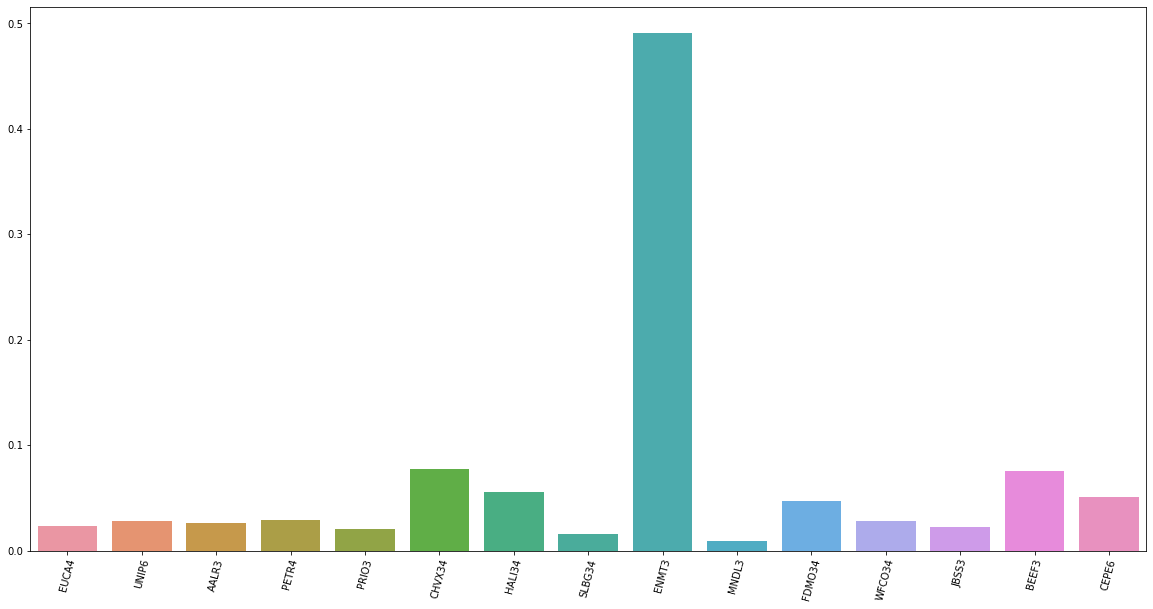

In [773]:
port_maximo = portf1[57474]
plt.figure(figsize=(20,10))
plt.tick_params(axis='x', rotation=75)
sns.barplot(y=port_maximo,x=df_ret1.columns)

A seguir a rentabilidade da carteira de Sharp Ótimo contra a carteira de mercado

<AxesSubplot:xlabel='Date'>

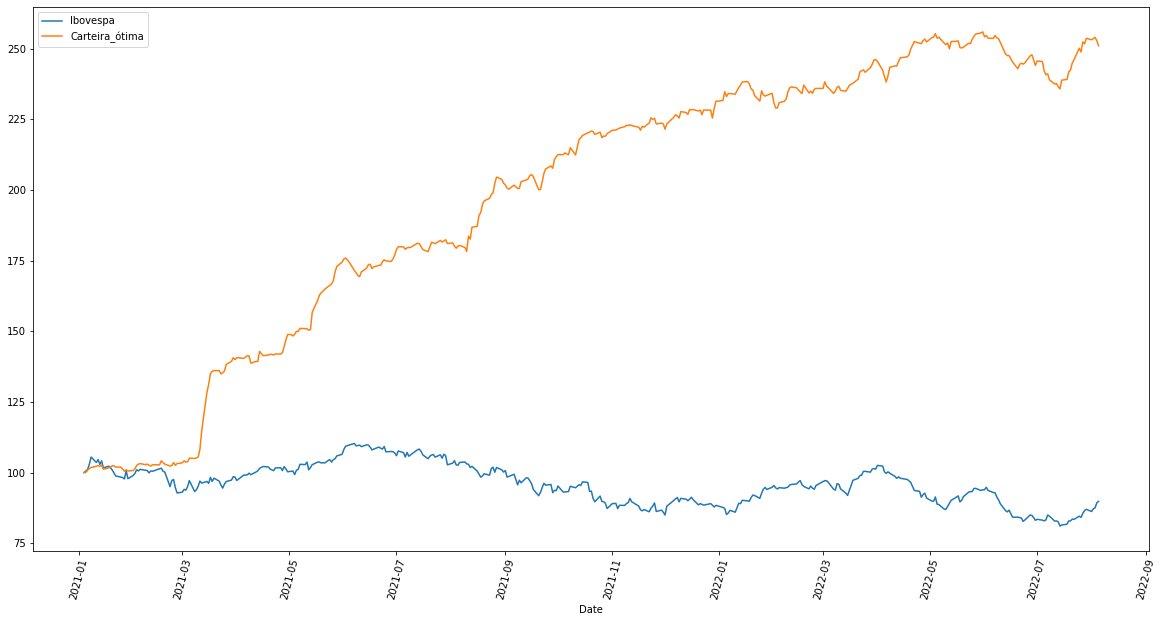

In [774]:
df_ret1['Max_Sharp'] = df_ret1.iloc[:,:50].dot(portf1[0])
ibov= df_ret2[df_ret2.index > "2021-01-01"]
plt.figure(figsize=(20,10))

x_ax = (ibov).index
x_ax2 = (df_ret1).index

y_ibov = (ibov['Close/Last'] / ibov['Close/Last'][0]).values
y_sharp = (df_ret1['Max_Sharp']+1).cumprod().values


plt.tick_params(axis='x', rotation=75)
sns.lineplot(x=x_ax, y=y_ibov*100,label='Ibovespa')
sns.lineplot(x=x_ax2, y=y_sharp*100,label='Carteira_ótima')


#### Conclusão

Concluimos nosso trabalho chegando a conclusão de que a carteira de Sharp ótimo está muito longe de ser a carteira de mercado e é uma carteira fortemente concentrada em apenas um ativo, concluimos também que é possivel utilizar datascience em diversas aplicações, como por exemplo, mercado financeiro que está muito relacionado com a meta de vida dos autores